# Влияние условий жизни учащихся на их успеваемость по математике
## Описание
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Задачи
* провести разведывательный анализ данных
* сформулировать выводы

## Описание датасета

1. **school** — аббревиатура школы, в которой учится ученик
2. **sex** — пол ученика:
    * 'F' - женский, 
    * 'M' - мужской
3. **age** — возраст ученика (от 15 до 22)
4. **address** — тип адреса ученика:
    * 'U' - городской, 
    * 'R' - за городом
5. **famsize** — размер семьи:
    * 'LE3' <= 3, 
    * 'GT3' >3
6. **Pstatus** — статус совместного жилья родителей:
     'T' - живут вместе 
    * 'A' - раздельно
7. **Medu** — образование матери:
    * 0 - нет, 
    * 1 - 4 класса, 
    * 2 - 5-9 классы, 
    * 3 - среднее специальное или 11 классов, 
    * 4 - высшее
8. **Fedu** — образование отца:
    * 0 - нет, 
    * 1 - 4 класса, 
    * 2 - 5-9 классы, 
    * 3 - среднее специальное или 11 классов, 
    * 4 - высшее
9. **Mjob** — работа матери:
    * 'teacher' - учитель, 
    * 'health' - сфера здравоохранения, 
    * 'services' - гос служба, 
    * 'at_home' - не работает, 
    * 'other' - другое
10. **Fjob** — работа отца:
    * 'teacher' - учитель, 
    * 'health' - сфера здравоохранения, 
    * 'services' - гос служба, 
    * 'at_home' - не работает, 
    * 'other' - другое
11. **reason** — причина выбора школы:
    * 'home' - близость к дому, 
    * 'reputation' - репутация школы, 
    * 'course' - образовательная программа, 
    * 'other' - другое
12. **guardian** — опекун:
    * 'mother' - мать, 
    * 'father' - отец, 
    * 'other' - другое
13. **traveltime** — время в пути до школы:
    * 1 - <15 мин., 
    * 2 - 15-30 мин., 
    * 3 - 30-60 мин., 
    * 4 - >60 мин.
14. **studytime** — время на учёбу помимо школы в неделю:
    * 1 - <2 часов, 
    * 2 - 2-5 часов, 
    * 3 - 5-10 часов, 
    * 4 - >10 часов
15. **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. **schoolsup** — дополнительная образовательная поддержка (yes или no)
17. **famsup** — семейная образовательная поддержка (yes или no)
18. **paid** — дополнительные платные занятия по математике (yes или no)
19. **activities** — дополнительные внеучебные занятия (yes или no)
20. **nursery** — посещал детский сад (yes или no)
21. **higher** — хочет получить высшее образование (yes или no)
22. **internet** — наличие интернета дома (yes или no)
23. **romantic** — в романтических отношениях (yes или no)
24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. **absences** — количество пропущенных занятий
29. **score** — баллы по госэкзамену по математике

## Загрузка и предварительный осмотр данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math

pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
sm = pd.read_csv('stud_math.csv')
sm.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0  at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0  at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0  at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0   health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0    other    other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother         2.0        2.0       0.0       yes     no   no   
1  course   father         1.0        2.0       0.0        no    yes   no   
2   other   mother         1.0        2.0       3.0       yes     no  NaN   
3    home   mother         1.0        3.0       0.0        no    yes  yes   
4    home   father         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0

In [3]:
sm.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

1. Всего 395 записей, не густо. <br>
Будем стараться избегать удаления строк, их и так немного. 
2. Nullов не много, но они есть почти во всех колонках. 
3. В описании дата сета всего 29 полей. В нашем наборе 30. <br>
"studytime, granular" нет в описании. <br>
Чуть позже посмотрим на эту колонку повнимательней.

## Предобработка

In [4]:
# Переименование столбцов
col_names = list(sm.columns.map(str.lower)) 
col_names[20] = 'studytime_granular' # убирем запятую из имени столбца
sm.columns = col_names
sm.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

## Функции

In [5]:
numeric_cols = ["age", "score", "absences"]  # список числовых полей


def data_description():
    """ Выводит дополнительную информацию о пустых полях в датасете. """

    print("Размерность набора (строки, столбцы):", sm.shape, "\n")
    print("Кол-во полных дубликатов:", sm[sm.duplicated()].shape[0])
    print(
        "Кол-во пустых строк:     ", sm[sm.isna().all(axis="columns")].shape[0]
    )
    print(
        "Кол-во строк, имеющих хотя бы одно пустое значение:",
        sm[sm.isna().any(axis="columns")].shape[0],
    )
    print(
        "Кол-во строк, не имеющих ни одного пустого значения:",
        sm[sm.notna().all(axis="columns")].shape[0],
        "\n",
    )
    print("Информация о пустых значениях по столбцам (в процентах):")
    display(sm.isna().mean() * 100)
    print("   желтый - пропущенные данные, синий - не пустые")
    sns.heatmap(sm[sm.columns].isnull(), cmap="YlGnBu_r")

    return None


def field_values(column):
    """ Выводит список всех возможных значений в колонке. 
    Сортировка по значениям, а не по кол-ву. Плюс показывает 
    информацию по кол-ву NaN в этой колонке.  
    """
    print(sm.groupby([column])[column].count())
    print(
        "NaN ",
        sm[column].isna().sum(),
        "(",
        round(sm[column].isna().mean() * 100, 2),
        "% ) \n",
    )

    return None


def IQR_hist(column, outliers=False):
    """ Строит гистограмму и выводит все числовые значения для оценки наличия выбросов """

    IQR = sm[column].quantile(0.75) - sm[column].quantile(0.25)
    perc25 = sm[column].quantile(0.25)
    perc75 = sm[column].quantile(0.75)
    iqr_low = perc25 - 1.5 * IQR
    iqr_up = perc75 + 1.5 * IQR
    min_value = sm[column].min()
    max_value = sm[column].max()
    print(
        "Среднее: {},".format(round(sm[column].mean(), 2)),
        "Медиана: {},".format(round(sm[column].median(), 2)),
        "Мода: {},".format(list(sm[column].mode())),
    )
    print(
        "25-й перцентиль: {},".format(perc25),
        "75-й перцентиль: {},".format(perc75),
        "IQR: {}.".format(IQR),
    )
    print("Минимум/максимум: [{x}, {y}].".format(x=min_value, y=max_value))
    print("Границы выбросов: [{f}, {l}].".format(f=iqr_low, l=iqr_up))

    if outliers:
        ser = sm[column].loc[sm[column].between(min_value, max_value)].copy()
        nbins = ser.value_counts().count()
        ser.loc[(ser < iqr_low) | (ser > iqr_up)].hist(
            bins=nbins,
            range=(min_value, max_value),
            color="red",
            label="outliers",
        )
        ser.loc[ser.between(iqr_low, iqr_up)].hist(
            bins=nbins, range=(min_value, max_value), label="IQR"
        )
    else:
        min_interval = max(min_value, iqr_low)
        max_interval = min(max_value, iqr_up)
        ser = (
            sm[column]
            .loc[sm[column].between(min_interval, max_interval)]
            .copy()
        )
        nbins = ser.value_counts().count()
        ser.hist(bins=nbins, range=(min_interval, max_interval), label="IQR")
    plt.legend()

    return None


def get_stat_dif(column, target="score"):
    """ Тест Стьюдента. Возвращается True, если найдены 
    статистически значимые различия для колонки, иначе False
    """
    cols = sm[column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        pval = ttest_ind(
            sm.loc[sm[column] == comb[0], target],
            sm.loc[sm[column] == comb[1], target],
            nan_policy="omit",
        ).pvalue
        if pval <= (0.05 / len(combinations_all)):  # Учли поправку Бонферони
            print("Найдены статистически значимые различия для колонки", column)
            return True

    return False


def drop_outlier(column):
    """  Удаление выбросов """
    IQR = sm[column].quantile(0.75) - sm[column].quantile(0.25)
    perc25 = sm[column].quantile(0.25)
    perc75 = sm[column].quantile(0.75)

    return sm.loc[sm[column].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)]


def get_boxplot(column, target="score"):
    """ Отображет коробку с усами """
    if sm[column].value_counts().count() < 3:
        fig, ax = plt.subplots(figsize=(10, 3))
    else:
        fig, ax = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=column, y=target, data=sm, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title("Boxplot for " + column)
    plt.show()

    return None

## Столбец 'studytime_granular' (отсутствующий в описании):

In [6]:
# Сравним данные в столбце 'studytime_granular' с данными в'studytime'
display(sm[['studytime_granular', 'studytime']])
field_values('studytime_granular')
field_values('studytime')

studytime_granular  studytime
0                  -6.0        2.0
1                  -6.0        2.0
2                  -6.0        2.0
3                  -9.0        3.0
4                  -6.0        2.0
..                  ...        ...
390                -6.0        2.0
391                -3.0        1.0
392                -3.0        1.0
393                -3.0        1.0
394                -3.0        1.0

[395 rows x 2 columns]

studytime_granular
-12.0     27
-9.0      64
-6.0     194
-3.0     103
Name: studytime_granular, dtype: int64
NaN  7 ( 1.77 % ) 

studytime
1.0    103
2.0    194
3.0     64
4.0     27
Name: studytime, dtype: int64
NaN  7 ( 1.77 % ) 



In [7]:
#посмотрим на корреляцию этих двух полей
sm[['studytime_granular', 'studytime']].corr()

studytime_granular  studytime
studytime_granular                 1.0       -1.0
studytime                         -1.0        1.0

* 100% обратная корреляция между столбцами studytime и studytime_granular
* похоже studytime_granular просто умножение на -3 значений studytime
* нельзя с уверенностью сказать количественный или номинативный это столбец, <br>
так как нет описания

In [8]:
# Удаляем studytime_granular
sm.drop(columns=['studytime_granular'], inplace=True)


## Анализ данных

Из описания датасета и первичного осмотра видно, что:  
-***Числовых*** полей - 3 (три): age, absences, score.  
-Остальные поля ***Номинативные***, их 26.

-***Целевая*** колонка - score.

Размерность набора (строки, столбцы): (395, 29) 

Кол-во полных дубликатов: 0
Кол-во пустых строк:      0
Кол-во строк, имеющих хотя бы одно пустое значение: 298
Кол-во строк, не имеющих ни одного пустого значения: 97 

Информация о пустых значениях по столбцам (в процентах):


school         0.000000
sex            0.000000
age            0.000000
address        4.303797
famsize        6.835443
pstatus       11.392405
medu           0.759494
fedu           6.075949
mjob           4.810127
fjob           9.113924
reason         4.303797
guardian       7.848101
traveltime     7.088608
studytime      1.772152
failures       5.569620
schoolsup      2.278481
famsup         9.873418
paid          10.126582
activities     3.544304
nursery        4.050633
higher         5.063291
internet       8.607595
romantic       7.848101
famrel         6.835443
freetime       2.784810
goout          2.025316
health         3.797468
absences       3.037975
score          1.518987
dtype: float64

   желтый - пропущенные данные, синий - не пустые


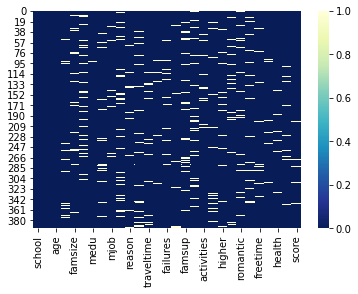

In [9]:
# посмотрим чуть более подробно на пустые значения во всем наборе
data_description()

## Замена пропусков
Решение о замене пропусков принимаем на основе:

1. Информации об объёме пропусков.
2. Информации о том, какой алгоритм планируется использовать в дальнейшем.

Выполнения данное задание мы не знаем какой алгоритм планируется использовать, <br>
в дальнейшем, поэтому будем ориентироваться просто на кол-во пропусков. 

Если пропусков:
* мало (менее 10 %) и алгоритм толерантен к их наличию, то можно не заморачиваться, либо заполнить самым простым способом.
* умеренно (до 30 %), то замена пропусков может быть более эффективна, чем удаление/не замена.
* много (более 40 %), то стоит задуматься над более тщательным сбором данных или удаления этого столбца.
* для целевого столбца заполнение пропусков - плохая идея.

## Столбец 'score' (целевой):

score
0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64
NaN  6 ( 1.52 % ) 

Среднее: 52.26, Медиана: 55.0, Мода: [50.0],
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0.
Минимум/максимум: [0.0, 100.0].
Границы выбросов: [-5.0, 115.0].


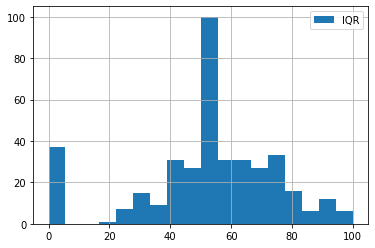

In [10]:
# посмотрим на значения в этом столбце и построим гистограмму
field_values('score')
IQR_hist('score')

<AxesSubplot:>

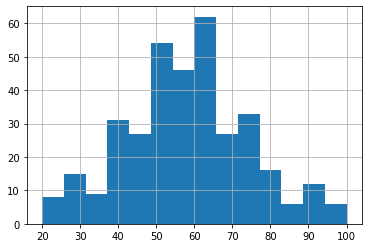

In [11]:
# на первый взгляд гистограмма говорит, что слева выброс,
# но расчеты этого не подтверждают(границы выбросов больше максимумов\минимумов)

# посмотрим на распределение без 0
sm.score[sm.score != 0.0].hist(bins=14)

Если смотреть на распределение без 0, то оно вполне себе выглядит нормальным.<br>
Смысл оценки 0 за экзамен не совсем понятен. <br>
Возможно это те, кто не сдавал экзамен, а может это просто незаполненные данные. <br>
Таких строк 37, плюс еще 6 NaN. В сумме это чуть больше 10% от всего кол-ва строк в наборе. <br>
Очень не хочется удалять, но это целевая колонка и замена данных тут недопустима.<br>

Поэтому удаляем значение 0.0 из этой колонки, но создадим новый булевый столбец no_score, чтобы не потерять данные. <br>
Позже, на этапе корреляционного анализа, попробуем все проверить не только для score, но и для no_score.<br>

Если NaN и 0.0 - это те, кто не сдавал экзамен, то возможно, что наши данные могут быть использованы и <br>
для прогнозированния, что студент не пойдет сдавать математику.

In [12]:
# создаем новый столбец no_score
sm["no_score"] = sm.score.apply(
    lambda x: None if pd.isnull(x) else 1 if x == 0 else 0
)
# проверяем
field_values("no_score")

no_score
0.0    352
1.0     37
Name: no_score, dtype: int64
NaN  6 ( 1.52 % ) 



score
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64
NaN  43 ( 10.89 % ) 

Среднее: 57.76, Медиана: 55.0, Мода: [50.0],
25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0.
Минимум/максимум: [20.0, 100.0].
Границы выбросов: [7.5, 107.5].


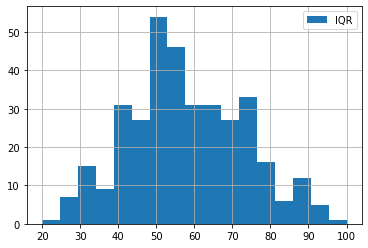

In [13]:
# заполняем NaNом нулевые значения в столбце score
sm.loc[sm.score == 0.0, 'score'] = None

# и посмотрим на этот слолбец еще раз
field_values('score')
IQR_hist('score')

Резюме - score: <br>
После удаления значения 0.0 (предварительно сохранив информацию об этом в новом столбце no_score) <br>
распределение выглядит близко к нормальному. Выбросов теперь нет.<br>
NaN конечно стало значительно больше (было 6 + 37, те что ранее были 0.0).<br>
Медиана и среднее достаточно близки (55 и 58). Мода чуть меньше (50).<br>

Резюме - no_score: <br>
Новый столбец, построенный на основе score. Представляет собой булево поле:
* 1 - в score был ноль
* 0 - в score было значение больше нуля
* NaN - в score изначально было NaN

Всего NaN 6 (это меньше 2%), оставим как есть

## Столбец 'age':

age
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64
NaN  0 ( 0.0 % ) 

Среднее: 16.7, Медиана: 17.0, Мода: [16],
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0.
Минимум/максимум: [15, 22].
Границы выбросов: [13.0, 21.0].


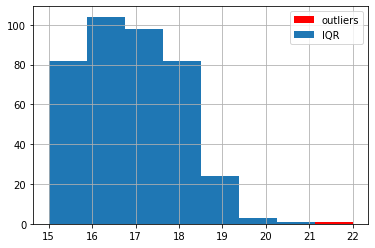

In [14]:
# посмотрим на значения в этом столбце и 
# построим гистограмму с учетом выбросов
field_values('age')
IQR_hist('age', True)

<AxesSubplot:>

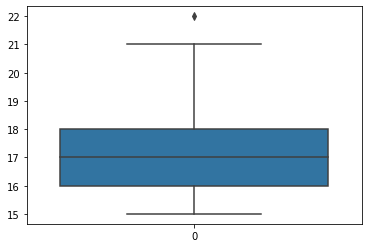

In [15]:
# построим ящик с усами для визуализации выбросов
sns.boxplot(data=sm.age)

Как видно выше  есть один выброс : 22. <br>
Он всего один и очень близко к границе усов (21). <br>

Не хотелось бы удалять эту строку так сразу. <br>
Распределение похоже на "Логнормальное распределение" (характеризуется наличием длинного хвоста справа).<br>
Из вики: Если случайная величина имеет логнормальное распределение, то её логарифм имеет нормальное распределение.<br>

### *Проверим эту гипотезу*:

<AxesSubplot:>

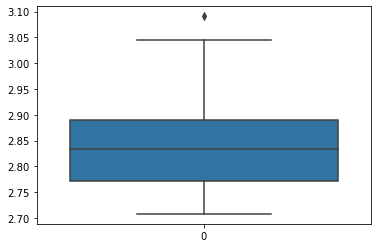

In [16]:
# можно применить логарифмирование и посмотреть уйдет ли выброс
sns.boxplot(data=sm.age.apply(lambda x: math.log(x)))

По расчетам 22 является выбросом, но если руководствоваться здравым смыслом, <br>
то это значение не сильно выбивается и вполне может быть правдой. <br>
Поэтому оставим его в выборке. <br>
На просторах интернета нашла описание метода, когда при таких выбрасах значение <br>
заменяется на граничное значение, и возможно в дальнейшем проверю на практике. <br>
Пока, в этом наборе, это не повлияло на дальнейшии вычисления. Так что оствим как есть.

Резюме - age: <br>
NaNов нет.<br>
Есть один выброс, но он очень близко к границы усов. <br>
 Решила оставить его в выборке без изменений.<br>
Распределение скорее логнормальное (то есть имеет длинный хвост справа). <br>
 Т.е. в нашем наборе редко встречаются ученики старше 18 лет.<br>
Большинство учеников в возрасте 16-17 лет (судя по Моде и Медиане).<br>

## Столбец 'absences':

absences
0.0      111
1.0        3
2.0       60
3.0        8
4.0       53
5.0        5
6.0       31
7.0        6
8.0       21
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64
NaN  12 ( 3.04 % ) 

Среднее: 7.28, Медиана: 4.0, Мода: [0.0],
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0.
Минимум/максимум: [0.0, 385.0].
Границы выбросов: [-12.0, 20.0].


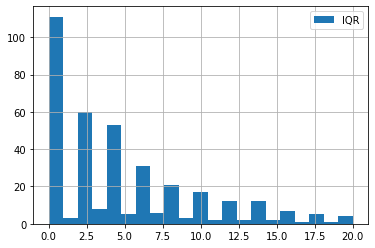

In [17]:
# посмотрим на значения в этом столбце и 
# построим гистограмму без учета выбросов
field_values('absences')
IQR_hist('absences')

<AxesSubplot:>

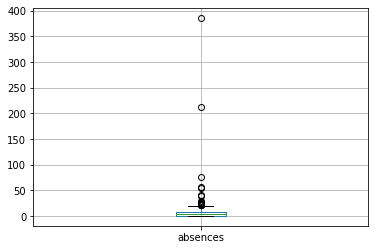

In [18]:
# построим ящик с усами для лучшей визуализации выбросов
sm.boxplot(column=['absences'])

Судя по графику выбросов очень много, все что больше 20 пропущенных часов  - это выбросы. <br>
Но по моим ощущения и 50 и 100 также вполне нормальные значения.<br> 
Максимум здесь 385, но и это значение не кажется ошибкой.

Гистограмма здесь (как и выше было для поля 'age') похожа на "Логнормальное распределение", <br>
которое характеризуется наличием длинного хвоста справа.

### *Проверим эту гипотезу: *

<AxesSubplot:>

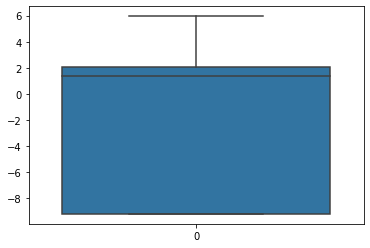

In [19]:
# Добавим к распределению небольшое смещение, 
# так как логарифм с нулем не дружит, а здесь ноль - это Мода.
sns.boxplot(data=sm.absences.apply(lambda x: math.log(x + 0.0001)))

выбросов нет <br>

Резюме - absences: <br>
Распределение логнормальное (то есть имеет длинный хвост справа). Выбросов нет. <br>
Пропусков всего 12 (это около 3%). Не будем заморачиваться с заменой.<br>
Среднее и Медиана сильно смещены влево, Мода вообще = 0. 

Есть некоторое сомнение по поводу интерпретации значения 0. 
Возможно часть строк - это просто незаполненные данные, а не 0 пропусков занятий.

## Посмотрим на номинативные признаки:

In [20]:
# Посмотрим на все номинативные стобцы скопом, 
# благо кол-во уникальных значений для каждого поля не велико.
# Для каждого поля будет выведено кол-во NaN в количественном и процентном виде
for fl in sm.columns:
    if fl not in numeric_cols:
        field_values(fl)

school
GP    349
MS     46
Name: school, dtype: int64
NaN  0 ( 0.0 % ) 

sex
F    208
M    187
Name: sex, dtype: int64
NaN  0 ( 0.0 % ) 

address
R     83
U    295
Name: address, dtype: int64
NaN  17 ( 4.3 % ) 

famsize
GT3    261
LE3    107
Name: famsize, dtype: int64
NaN  27 ( 6.84 % ) 

pstatus
A     36
T    314
Name: pstatus, dtype: int64
NaN  45 ( 11.39 % ) 

medu
0.0      3
1.0     59
2.0    102
3.0     97
4.0    131
Name: medu, dtype: int64
NaN  3 ( 0.76 % ) 

fedu
0.0       2
1.0      78
2.0     106
3.0      96
4.0      88
40.0      1
Name: fedu, dtype: int64
NaN  24 ( 6.08 % ) 

mjob
at_home      58
health       32
other       133
services     98
teacher      55
Name: mjob, dtype: int64
NaN  19 ( 4.81 % ) 

fjob
at_home      16
health       15
other       197
services    102
teacher      29
Name: fjob, dtype: int64
NaN  36 ( 9.11 % ) 

reason
course        137
home          104
other          34
reputation    103
Name: reason, dtype: int64
NaN  17 ( 4.3 % ) 

guardian
father  

Явные оЧеПятоки это:
* fedu - возможные значения от 1 до 4. Есть одно значение 40 (одна строка). Возможно ошиблись и это 4
* famrel - возможные значения от 1 до 5. Есть одно значение -1 (одна строка). Возможно ошиблись и это 1

In [21]:
# Если бы у нас было много строк, то просто бы удалила эти две строки.
# Вот так:
# sm = sm.loc[sm.fedu != 40.0]
# sm = sm.loc[sm.famrel != -1.0]

# Но у нас мало данных, рискну все же исправить данные
sm.loc[sm['fedu'] == 40.0, 'fedu'] = 4.0
sm.loc[sm['famrel'] == -1.0, 'famrel'] = 1.0

In [22]:
# посмотрим на столбец 'pstatus' с самым большим ко-вом пропусков = 45
#  это 11.4 %, что уже стоит рассмотреть и, по-возможности, заполнить.
field_values('pstatus')
sm.pstatus.value_counts(normalize=True)

pstatus
A     36
T    314
Name: pstatus, dtype: int64
NaN  45 ( 11.39 % ) 



T    0.897143
A    0.102857
Name: pstatus, dtype: float64

In [23]:
# как видно 'T' (мода) явно преобладает над 'A' 
# и можно было бы просто все пропуски заполнить 'T'
# но хотелось бы сохранить соотношение между 'T' и 'A', 
# а не просто увеличивать кол-во 'T' 

# Можно взять пропорцию из score (вернее нового поля no_score).
# Если смотреть по выборке пустых 'pstatus', то отношение между 0.0 
# (оценка больше 0) и 1.0(оценка=0.0), очень похожа на то, что нам требуется. 
# Также среди этих 45 записей в колонке no_score нет NaN.  
display(sm[sm.pstatus.isnull()].no_score.value_counts())
display(sm[sm.pstatus.isnull()].no_score.value_counts(normalize=True))

0.0    41
1.0     4
Name: no_score, dtype: int64

0.0    0.911111
1.0    0.088889
Name: no_score, dtype: float64

In [24]:
# Заменим 41 запись на 'T' и 4 записи на 'A'
sm.loc[
    (sm['no_score'] == 0.0) & (sm.pstatus.isnull()), 'pstatus'
] = sm.pstatus.value_counts().index[0]
sm.pstatus = sm.pstatus.fillna(sm.pstatus.value_counts().index[1])

# проверим
field_values('pstatus')
sm.pstatus.value_counts(normalize=True)

pstatus
A     40
T    355
Name: pstatus, dtype: int64
NaN  0 ( 0.0 % ) 



T    0.898734
A    0.101266
Name: pstatus, dtype: float64

Как можно увидеть соотношение между T и A осталось почти таким же. <br>

In [25]:
# Посмотрим на столбец 'paid'. Здесь тоже много пропусков = 40.
# Это чуть больше 10%.  
field_values('paid')
sm.paid.value_counts(normalize=True)

paid
no     200
yes    155
Name: paid, dtype: int64
NaN  40 ( 10.13 % ) 



no     0.56338
yes    0.43662
Name: paid, dtype: float64

Здесь тоже всего два возможных значения('yes', 'no'), но в отличии от  <br>
предыдущего случая, однозначно доминирующее значение выделить нельзя.  <br>
Заполнить пропуски на данный момент не представляется возможным.

In [26]:
# Еще один столбец 'famsup'. Здесь пропусков = 39.
# Это чуть меньше 10%.  
field_values('famsup')
sm.famsup.value_counts(normalize=True)

famsup
no     137
yes    219
Name: famsup, dtype: int64
NaN  39 ( 9.87 % ) 



yes    0.615169
no     0.384831
Name: famsup, dtype: float64

Опять же, всего два возможных значения('yes', 'no'), с небольшим преимуществом 'yes'. <br>
Но назвать его однозначно доминирующим значение не могу. <br>
Воздержусь от заполнения пропусковэтого поля.

## Корреляционный анализ

Выясним, какие столбцы коррелируют с score. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.


### Корреляции рассмотрим только для числовых столбцов:'age', 'absences' и 'score'(целевой).

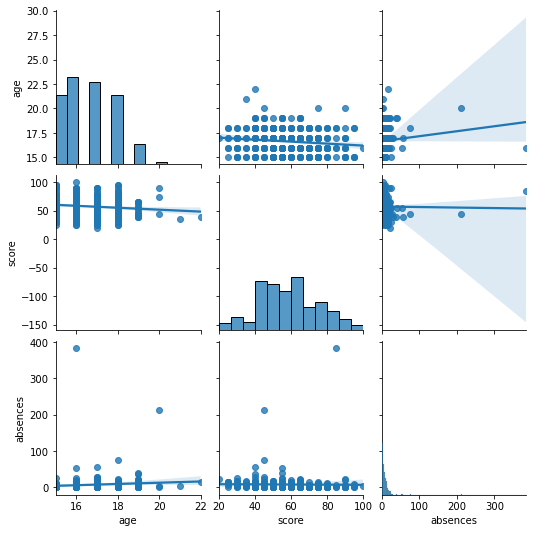

In [27]:
sns.pairplot(sm[numeric_cols], kind='reg')

In [28]:
sm[numeric_cols].corr()

age     score  absences
age       1.000000 -0.131542  0.093592
score    -0.131542  1.000000 -0.014039
absences  0.093592 -0.014039  1.000000

Особой связи не заметно. Оставляем оба критерия ('age', 'absences'). 

Хоть явной корреляции и нет, но можно отметить, что между возрастом есть обратная корреляция, чем выше возраст тем ниже score.

## Анализ номинативных переменных

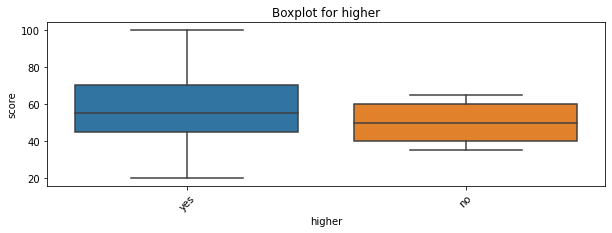

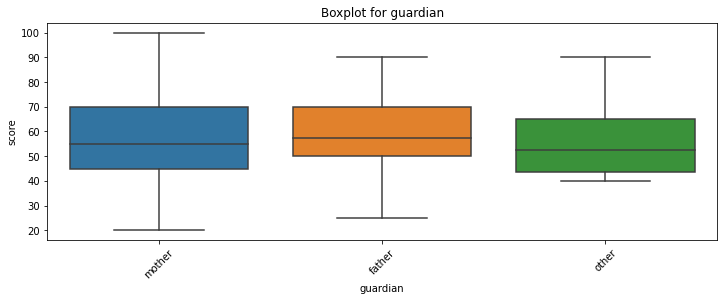

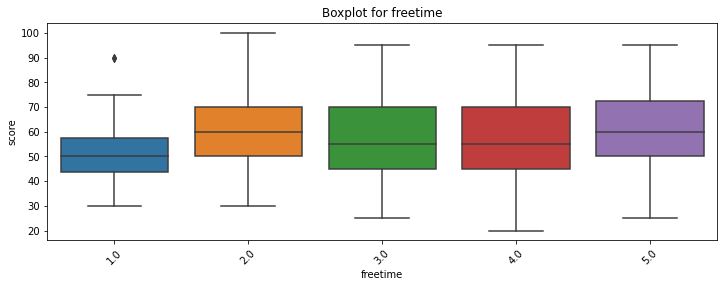

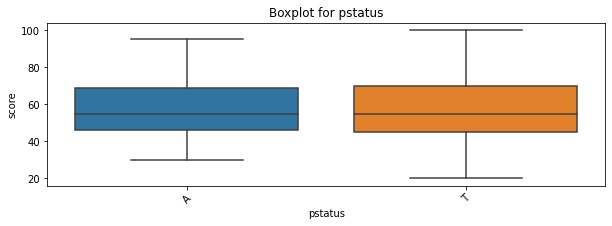

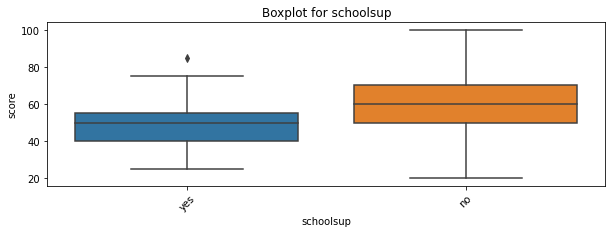

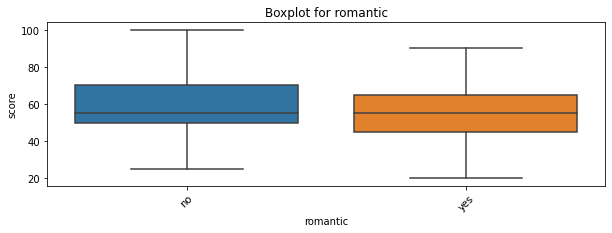

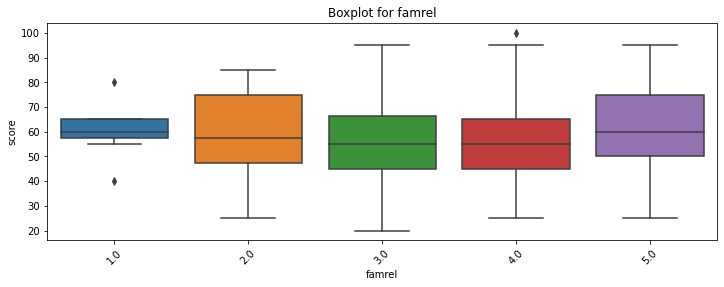

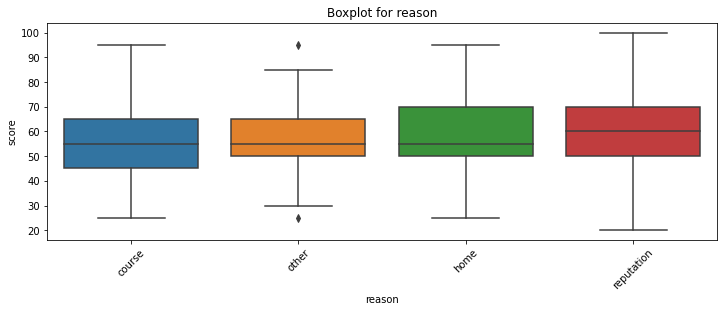

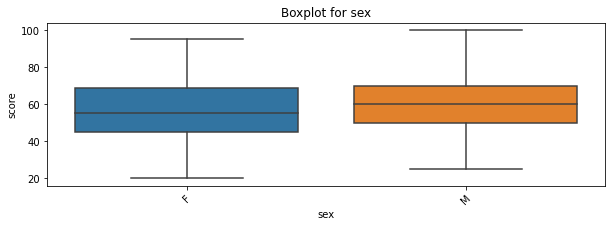

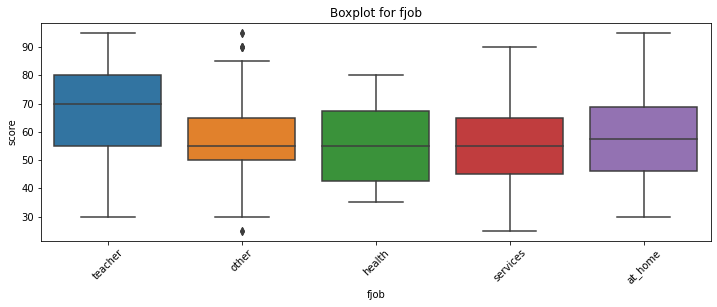

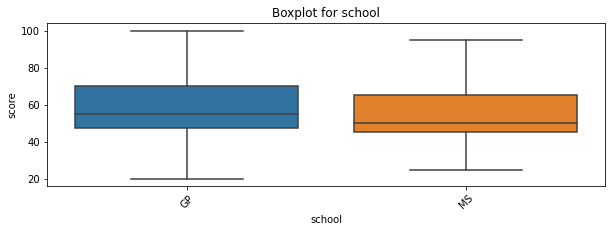

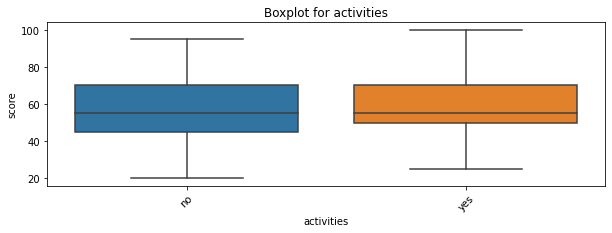

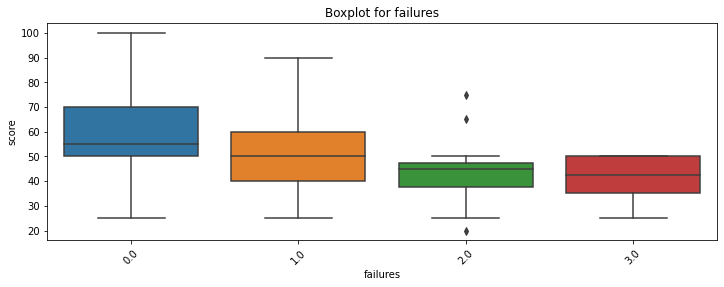

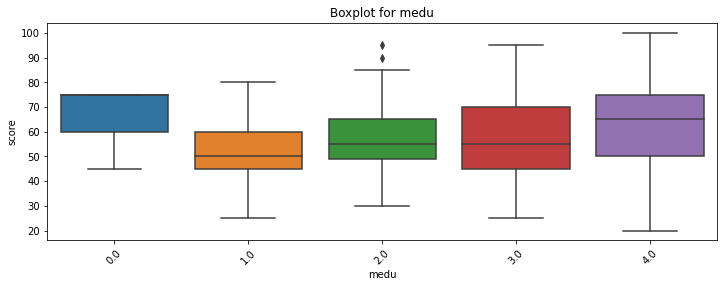

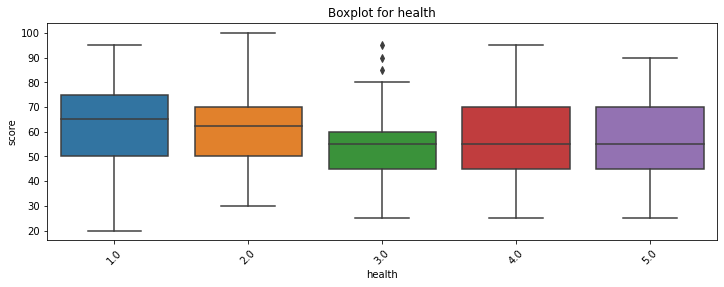

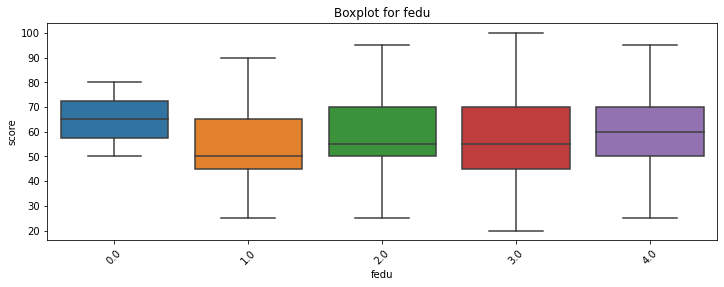

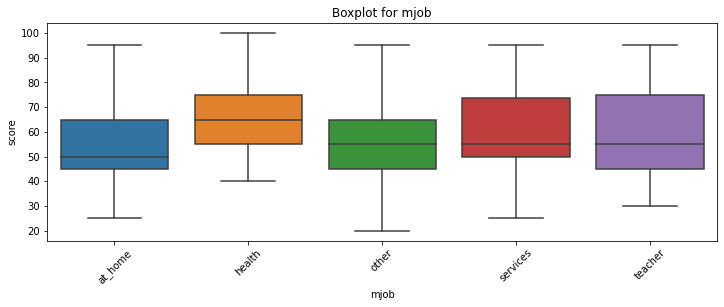

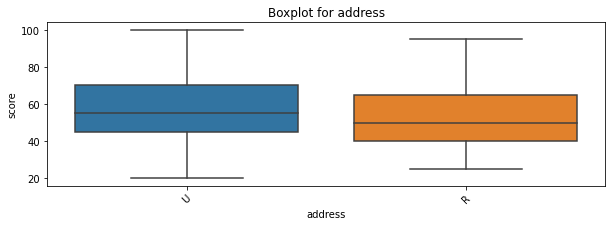

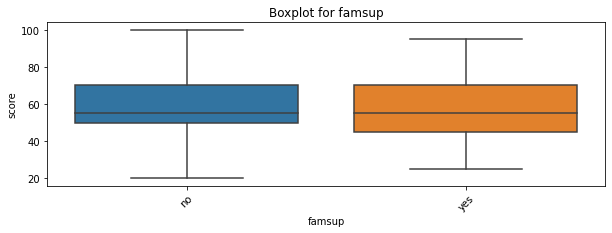

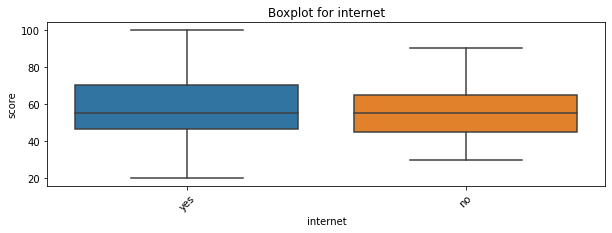

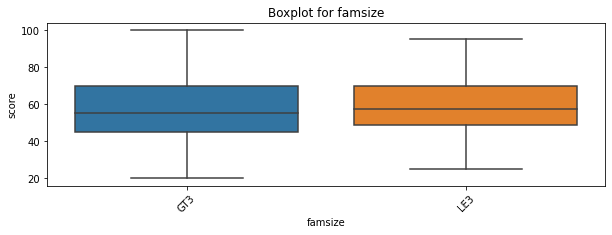

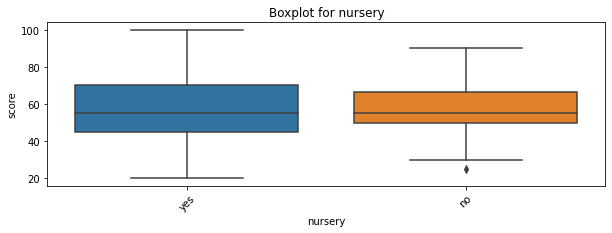

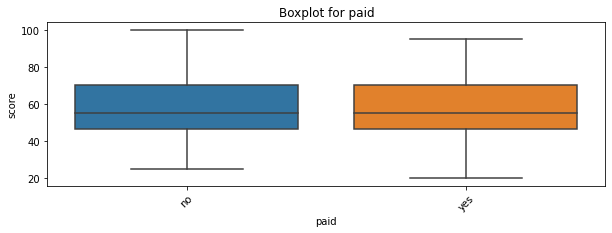

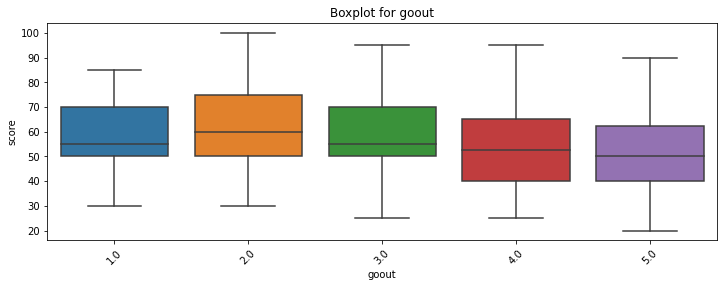

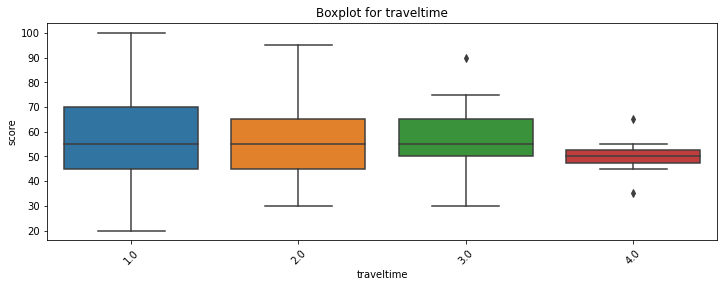

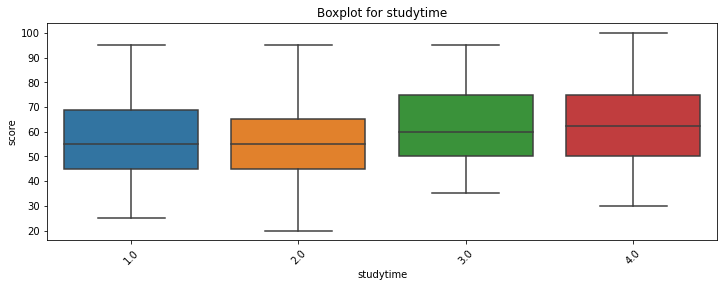

In [29]:
# построим box plot для всех номинативных признаков

# Предварительно создадим список всех номинативныx признаков
other_cols = list(
    set(sm.columns) - set(numeric_cols)
)  # из всех полей удаляем количественные
other_cols.remove('no_score')  # убираем no_score

for col in other_cols:
    get_boxplot(col)

Визуально кажется, что плотности распределения существенно различаются для следующих распределений:
- medu
- freetime
- address
- fjob
- mjob
- goout
- fedu
- failures
- studytime
- schoolsup

Посмотрим, что покажет тест Стюдентса.

## Тест Стьюдента по всем номинативным признакам

In [30]:
# Проверим, есть ли статистическая разница в распределении оценок 
# по номинативным признакам, с помощью теста Стьюдента. 
# Проверим нулевую гипотезу о том, что распределения оценок 
# (score и no_score) учеников по различным параметрам неразличимы:

# Предварительно создадим список всех номинативныx признаков
# Делала это на предыдущем шаге, но на всякий случай пересоздадим
other_cols = list(
    set(sm.columns) - set(numeric_cols)
)  # из всех полей удаляем количественные
other_cols.remove('no_score')  # убираем no_score

print('score: \n-----')
score_list = list()
for col in other_cols:
    if get_stat_dif(col):
        score_list.append(col)
print(' -')

# Вспоминаем о новой признаке no_score. 
# Проведем тест Стьюдента и для него:
print('no_score: \n--------')
nscore_list = list()
for col in other_cols:
    if get_stat_dif(col,'no_score'):
        nscore_list.append(col)
print(' -')

# Объединим два списка, сохранив только уникальные значения
ttest_list = list(set(score_list) | set(nscore_list))
print('Полный список уникальных признаков:')
print(ttest_list)

score: 
-----
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки studytime
 -
no_score: 
--------
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
 -
Полный список уникальных признаков:
['fedu', 'higher', 'mjob', 'schoolsup', 'address', 'romantic', 'failures', 'fjob', 'medu', 'paid', 'goout', 'studytime']


Резюме - тест Стьюдента: достаточно отличаются 12 параметров: <br>
'medu', 'fedu', 'failures', 'higher', 'studytime', 'fjob', <br>
'address', 'mjob', 'romantic', 'goout', 'schoolsup', 'paid'. <br>
Оставим и эти переменные в датасете для дальнейшего построения модели.

## Создание финального набора:

In [31]:
# Объединим наш список с двумя числовыми полями 'age' и 'absences' 
# и добавим наши целевые 'score' и 'no_score' столбцы
ttest_list.extend(numeric_cols)
ttest_list.append('no_score')

In [32]:
# К сожалению, последовательность полей в нешем ttest_list 
# отличается от той, что в исходном наборе. 
# преобразуем наш список, чтобы сохранить оригинальную 
# последовательность колонок в итоговом наборе
final_list = list()
for col in sm.columns:
    if col in ttest_list:
        final_list.append(col)
# и создадим наш итоговый набор
sm_for_model = sm.loc[:, final_list].copy()
display(sm_for_model.head())
sm_for_model.info()

age address  medu  fedu     mjob     fjob  studytime  failures schoolsup  \
0   18       U   4.0   4.0  at_home  teacher        2.0       0.0       yes   
1   17       U   1.0   1.0  at_home    other        2.0       0.0        no   
2   15       U   1.0   1.0  at_home    other        2.0       3.0       yes   
3   15       U   4.0   2.0   health      NaN        3.0       0.0        no   
4   16       U   3.0   3.0    other    other        2.0       0.0        no   

  paid higher romantic  goout  absences  score  no_score  
0   no    yes       no    4.0       6.0   30.0       0.0  
1   no    yes       no    3.0       4.0   30.0       0.0  
2  NaN    yes      NaN    2.0      10.0   50.0       0.0  
3  yes    yes      yes    2.0       2.0   75.0       0.0  
4  yes    yes       no    2.0       4.0   50.0       0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        395 non-null    int64  
 1   address    378 non-null    object 
 2   medu       392 non-null    float64
 3   fedu       371 non-null    float64
 4   mjob       376 non-null    object 
 5   fjob       359 non-null    object 
 6   studytime  388 non-null    float64
 7   failures   373 non-null    float64
 8   schoolsup  386 non-null    object 
 9   paid       355 non-null    object 
 10  higher     375 non-null    object 
 11  romantic   364 non-null    object 
 12  goout      387 non-null    float64
 13  absences   383 non-null    float64
 14  score      352 non-null    float64
 15  no_score   389 non-null    float64
dtypes: float64(8), int64(1), object(7)
memory usage: 49.5+ KB


визуально столбы все есть, значения тоже соответствующие

In [33]:
# теперь проверим нет ли очень сильно скоррелированных столбцов
sm_for_model.corr()

age      medu      fedu  studytime  failures     goout  \
age        1.000000 -0.161704 -0.163670  -0.015556  0.228047  0.135107   
medu      -0.161704  1.000000  0.625516   0.078589 -0.245463  0.064164   
fedu      -0.163670  0.625516  1.000000   0.012896 -0.272882  0.042663   
studytime -0.015556  0.078589  0.012896   1.000000 -0.178992 -0.051280   
failures   0.228047 -0.245463 -0.272882  -0.178992  1.000000  0.120914   
goout      0.135107  0.064164  0.042663  -0.051280  0.120914  1.000000   
absences   0.093592 -0.011944  0.022572  -0.026544  0.057391 -0.048738   
score     -0.131542  0.186477  0.135268   0.142055 -0.289377 -0.182286   
no_score   0.097603 -0.127218 -0.060536  -0.035106  0.236297  0.020959   

           absences     score  no_score  
age        0.093592 -0.131542  0.097603  
medu      -0.011944  0.186477 -0.127218  
fedu       0.022572  0.135268 -0.060536  
studytime -0.026544  0.142055 -0.035106  
failures   0.057391 -0.289377  0.236297  
goout     -0.048738 -0.182286  0.020959  
absences   1.000000 -0.014039 -0.100701  
score     -0.014039  1.000000       NaN  
no_score  -0.100701       NaN  1.000000

<AxesSubplot:>

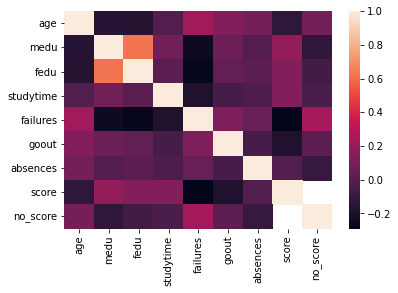

In [34]:
# визуально это отследить тяжеловато, поэтому построим тепловую карту
sns.heatmap(sm_for_model.corr())

Cветлые зоны, кроме диагонали, в датасете есть только у нашего созданного столбца no_score - это ожидаемо, <br>
Еще столбцы fedu и medu имеют достаточно большой процент корреляции 0.62, но это не единица. Визуальный осмотр <br>
значений по этим столбцам показал, что значений очень близких к 1 или -1 нет, значит все ок.

Можно еще заменить значения в номинативных столбцах со строковыми значениями на числовые. <br>
Но на выводы это никак не повлияет, опустим здесь этот пункт.

# Выводы

в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

- в данных достаточно мало пустых значений, но только 3 столбца из 29 заполнены полностью. Самый большой процент пропусков был в pstatus = 11.4%
- всего 3 числовых столбца (включая целевой), остальные номинативные
- уникальных значений в номинативных столбцах немного - 2,3,4,5
- столбцы studytime и studytime_granular полность скоррелированы. studytime_granular удален, так как к нему, в отличии от studytime, нет описания
- выбросы найдены:
  - в столбце возраст (значение 22 удалять/изменять не стала, т.к. оно очень близко к границе (21))
  - в столбце score (значение 0.0 удалено, на его основе создан новый булевый столбец no_score)
- гипотезы:  
  - отрицательная корреляция параметра age и score может говорить о том, что чем выше возраст тем ниже score
  - отрицательная корреляция параметра failures и score может говорить о том, что чем больше неудач по другим предметам тем ниже score
  - отрицательная корреляция параметра goout и score может говорить о том, что чем больше ученик проводит времени с друзьями тем ниже score
  - положительная корреляция по парамметру medu говорит о том, что чем выше образование матери, тем выше score
  - положительная корреляция по парамметру fedu говорит о том, что чем выше образование отца, тем выше score
  - положительная корреляция по парамметру studytime говорит о том, что чем больше времени тратиться на учебу помимо школы, тем выше score
- cамых важных критериев, которые предлагается использовать в дальнейшем для построения модели 14, это: age, absences, address, schoolsup, medu, fedu, mjob, fjob, studytime, failures, goout, paid, higher, romantic. 
